In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("all_reults_v4.csv", index_col=0)
df.head()

,FileName,Dataset,Label,y_pred0_0,y_pred0_1,y_pred1,pred1_label,pred0_label
0,mw2_0018,mw2,1,0.014755,0.985245,1.000000,1,1
1,mw2_0029,mw2,1,0.594453,0.405547,0.996347,1,0
2,mw2_0003,mw2,1,0.063864,0.936136,0.999998,1,1
3,mw2_0032,mw2,1,0.048411,0.951589,0.943927,1,1
4,mw2_0001,mw2,1,0.571765,0.428235,0.773990,1,0


In [6]:
def calculate_accuracy(group):
    acc_pred0 = (group['pred0_label'] == group['Label']).mean()
    acc_pred1 = (group['pred1_label'] == group['Label']).mean()
    return pd.Series({'Accuracy_pred0': acc_pred0, 'Accuracy_pred1': acc_pred1 })

# Group by 'Dataset' and apply the accuracy function
accuracy_results = df.groupby('Dataset').apply(calculate_accuracy)
accuracy_results

,Accuracy_pred0,Accuracy_pred1
Dataset,,
gw2,0.588235,0.529412
gw3,0.741379,0.603448
gw4,0.734694,0.591837
gw5,0.780822,0.287671
gw6,0.987805,0.963415
mw1,0.416667,0.750000
mw2,0.880000,0.860000
mw3,0.700000,0.700000
mw4,0.862069,0.724138


Generally, the result shows that random forest outperforms malconv in most testsets. It is reasonable as random forest is trained with much larger dataset and its non-linearity nature fits malware detection better. But in malware 1 testsets, malconv gets much higher accuracy. Next, we are going to examine the result in details and design pipeline to intergrate the benefits of both models

In [7]:
# Adding columns for correctness
df['correct_pred0'] = (df['pred0_label'] == df['Label']).astype(int)
df['correct_pred1'] = (df['pred1_label'] == df['Label']).astype(int)

In [69]:
both_correct = df[(df['pred0_label'] == df['pred1_label']) & (df['pred0_label'] == df['Label'])]
pred0_correct = df[(df['pred0_label'] != df['pred1_label']) & (df['pred0_label'] == df['Label'])]
pred1_correct = df[(df['pred0_label'] != df['pred1_label']) & (df['pred1_label'] == df['Label'])]
both_incorrect = df[(df['pred0_label'] == df['pred1_label']) & (df['pred0_label'] != df['Label'])]


In [70]:
print("Count")
print(f"Both correct : {both_correct.shape[0]}")
print(f"Both correct : {both_incorrect.shape[0]}")
print(f"RF correct : {pred0_correct.shape[0]}")
print(f"Malconv correct : {pred1_correct.shape[0]}")

Count
Both correct : 349
Both correct : 65
RF correct : 145
Malconv correct : 41


In [72]:
# Percentage of samples that are predicted correctly by both models
both_correct_p = both_correct.groupby('Dataset').count()['Label'] / df.groupby('Dataset').count()['Label']
both_incorrect_p = both_incorrect.groupby('Dataset').count()['Label'] / df.groupby('Dataset').count()['Label']
# both_correct_p

In [60]:
# Percentage of samples that are predicted correctly by RF
pred0_correct_p = pred0_correct.groupby('Dataset').count()['Label'] / df.groupby('Dataset').count()['Label']
# pred0_correct_p

In [61]:
pred1_correct_p = pred1_correct.groupby('Dataset').count()['Label'] / df.groupby('Dataset').count()['Label']
# pred1_correct_p

In [77]:
data = pd.DataFrame({
    'Both Correct': both_correct_p,
    'Pred0 Correct': pred0_correct_p,
    'Pred1 Correct': pred1_correct_p,
    'Both Incorrect': both_incorrect_p
})

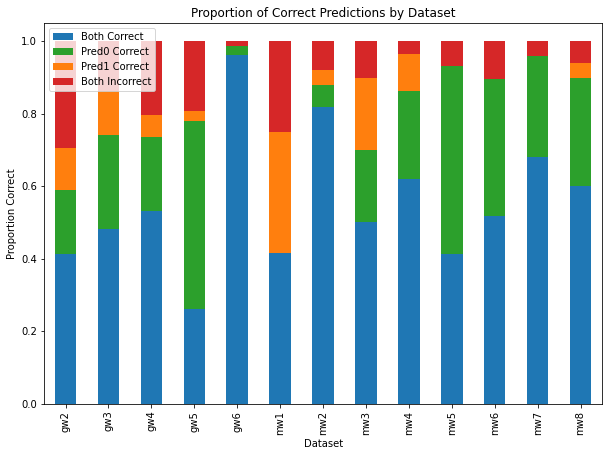

In [78]:
# Plotting
ax = data.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#1f77b4','#2ca02c','#ff7f0e','#d62728'])

# Adding titles and labels
plt.title('Proportion of Correct Predictions by Dataset')
plt.xlabel('Dataset')
plt.ylabel('Proportion Correct')

# Show the plot
plt.show()
